In [1]:
!date

Wed Jun 12 17:13:33 PDT 2019


# Supplementary Figure 10

In [12]:
import glob
import pandas as pd
import numpy as np
import pandas as pd
import scipy as scp
import sklearn
import itertools
from scipy.optimize import fsolve
from upsetplot import generate_data, plot, from_memberships
from collections import Counter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
%config InlineBackend.figure_format = 'retina'

In [2]:
v2_names = np.array(['SRR8599150_v2',
       'heart1k_v2', 'SRR8611943_v2',
       'SRR8257100_v2', 'EMTAB7320_v2',
       'SRR7299563_v2', 'SRR8513910_v2',
       'SRR8639063_v2', 'SRR8524760_v2',
       'SRR6956073_v2', 'hgmm1k_v2',
       'SRR8206317_v2', 'SRR8327928_v2',
       'SRR6998058_v2'], dtype=object)

v3_names = np.array(['pbmc_1k_v3', 'hgmm10k_v3',
       'neuron_10k_v3', 'pbmc_10k_v3',
       'heart1k_v3', 'hgmm1k_v3'], dtype=object)

In [3]:
v2_data = {}
v2_data["EMTAB7320_v2"]  = {"n_reads": 335147976}
v2_data["heart1k_v2"]  = {"n_reads": 88872840}
v2_data["hgmm1k_v2"] = {"n_reads": 75225120}
v2_data["SRR6956073_v2"] = {"n_reads": 161274652}
v2_data["SRR6998058_v2"] = {"n_reads": 37227612}
v2_data["SRR7299563_v2"]  = {"n_reads": 112176350}
v2_data["SRR8206317_v2"] = {"n_reads": 85992089}
v2_data["SRR8257100_v2"]  = {"n_reads": 189337914}
v2_data["SRR8327928_v2"] = {"n_reads": 190094560}
v2_data["SRR8513910_v2"]  = {"n_reads": 146617182}
v2_data["SRR8524760_v2"]  = {"n_reads": 97106426}
v2_data["SRR8599150_v2"]  = {"n_reads": 8860361}
v2_data["SRR8611943_v2"]  = {"n_reads": 21574502}
v2_data["SRR8639063_v2"]  = {"n_reads": 416437344}

v2_data["EMTAB7320_v2"]["n_cells"] = 4510
v2_data["heart1k_v2"]["n_cells"] = 712
v2_data["hgmm1k_v2"]["n_cells"] = 1079
v2_data["SRR6956073_v2"]["n_cells"] = 4168
v2_data["SRR6998058_v2"]["n_cells"] = 575
v2_data["SRR7299563_v2"]["n_cells"] = 1660
v2_data["SRR8206317_v2"]["n_cells"] = 4418
v2_data["SRR8257100_v2"]["n_cells"] = 11685
v2_data["SRR8327928_v2"]["n_cells"] = 10396
v2_data["SRR8513910_v2"]["n_cells"] = 726
v2_data["SRR8524760_v2"]["n_cells"] = 3064
v2_data["SRR8599150_v2"]["n_cells"] = 3949
v2_data["SRR8611943_v2"]["n_cells"] = 5194
v2_data["SRR8639063_v2"]["n_cells"] = 6614

In [4]:
v3_data = {}
v3_data["hgmm1k_v3"] = {"n_reads": 63105786}
v3_data["neuron_10k_v3"] = {"n_reads": 357111595}
v3_data["pbmc_10k_v3"] = {"n_reads": 638901019}
v3_data["pbmc_1k_v3"] = {"n_reads": 66601887}
v3_data["heart1k_v3"] = {"n_reads": 84512390}
v3_data["hgmm10k_v3"] = {"n_reads": 721180737}

v3_data["hgmm1k_v3"]["n_cells"] = 1011
v3_data["neuron_10k_v3"]["n_cells"] = 11477
v3_data["pbmc_10k_v3"]["n_cells"] = 1045
v3_data["pbmc_1k_v3"]["n_cells"] = 11790
v3_data["heart1k_v3"]["n_cells"] = 11692
v3_data["hgmm10k_v3"]["n_cells"] = 1227

In [7]:
wc = np.array([
1199.8762,
179.2501,
172.5408,
1587.5992,
161.4742,
134.1158,
757.4404,
1396.9626,
140.7343,
296.7755,
109.6389,
316.2492,
159.6467,
535.0286,
507.2315,
460.8943,
241.064,
34.2791,
54.5309,
913.8945])

In [8]:
step1 = np.array([
1143.6561,
175.971,
171.0117,
1524.3187,
179.7669,
160.1847,
638.558,
1197.2474,
144.97,
333.1213,
136.9176,
296.5414,
210.6186,
634.3511,
531.0303,
491.4653,
226.5739,
42.7977,
58.0428,
1072.877])

In [9]:
step2 = np.array([
257.9683,
56.5517,
256.7869,
783.4384,
61.5534,
254.8654,
470.109,
533.5196,
284.5916,
88.6416,
35.5582,
54.2647,
80.2414,
165.6262,
125.5003,
80.8037,
57.5854,
26.8666,
39.2758,
258.5717])

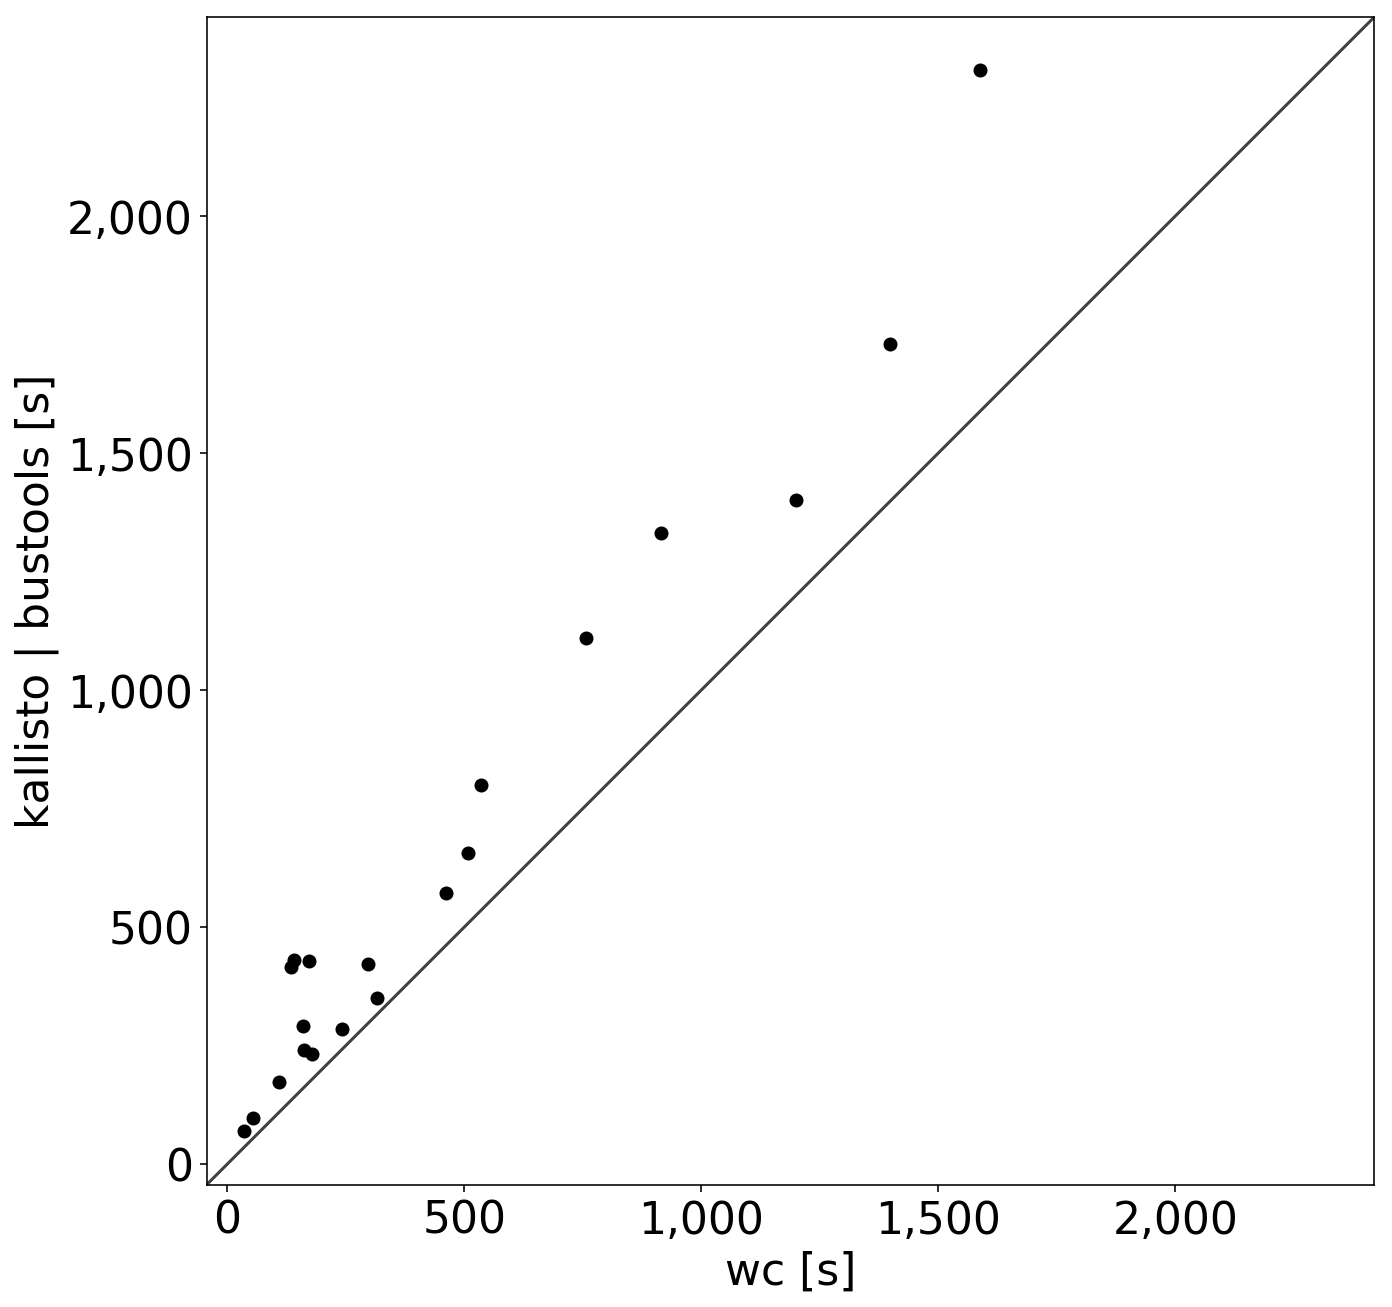

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(wc, step1+step2, color="k")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel("wc [s]")
ax.set_ylabel("kallisto | bustools [s]")
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.savefig("wc_runtime.pdf")
plt.show()